# Produce Excel file of the results

In [193]:
import pandas as pd
import numpy as np
import pickle 
import os
import shutil
import warnings
import subprocess
from subprocess import PIPE
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [7]:
def switch_obj(_str):
    if _str == "USE_IRRI,C,5":
        _str = "Irrigation"
    if _str == "USE_ELEC,C,5":
        _str = "Hydroelectric"
    if _str == "USE_SUPP,C,5":
        _str = "Water Supply"
    if _str == "USE_FCON,C,5":
        _str = "Flood Control"
    if _str == "USE_RECR,C,5":
        _str = "Recreation"
    return _str


In [22]:
idx_one_obj = [55, 57, 60, 63, 157, 165, 292, 295, 317, 319, 320, 361, 368, 372, 374, 378, 385, 386, 399, 419, 445, 448, 470, 471, 473, 506, 519, 527, 536, 549, 654, 868, 931, 987, 93, 204, 405, 616, 920, 1291, 1292, 1787, 1817, 1823,1800, 56, 88, 90, 99, 777, 836, 854, 861, 957, 965, 972, 974, 982, 1000, 1017, 1019, 1021, 1027, 1101, 1237, 1586, 1587, 1592, 1600, 1606, 1617, 1619, 1620, 1631, 1636, 1645, 1654, 1691, 1699, 1706, 1709, 1712, 1713, 1718, 1726, 1733, 1735, 1740, 1741, 1843, 1848, 1855, 1864, 1869, 163, 907, 911, 969]


In [23]:
len(idx_one_obj)

98

In [73]:
idx_multi_obj = [55, 57, 60, 63, 87, 114, 116, 131, 132, 157, 165, 182, 198, 210, 292, 293, 295, 300, 317, 319, 320, 361, 362, 367, 368, 372, 374, 378, 382, 384, 385, 386, 398, 399, 413, 415, 416, 419, 421, 442, 445, 448, 449, 450, 469, 470, 471, 473, 477, 492, 493, 502, 506, 514, 517, 518, 519, 527, 531, 536, 546, 549, 554, 567, 572, 595, 601, 604, 654, 780, 784, 868, 872, 893, 936, 938, 939, 953, 956, 976, 931, 1095, 1242, 192, 373, 545, 987, 1109, 438, 456, 657, 898, 310, 542, 41, 42, 80, 89, 93, 204, 297, 305, 364, 405, 423, 541, 597, 616, 913, 920, 929, 1044, 1053, 1112, 1269, 1283, 1291, 1292, 1297, 1752, 1756, 1758, 1768, 1787, 1817, 1823, 1834, 1835, 1851, 1872, 7306, 7308, 7313, 7318, 1754, 1774, 1801, 1879, 1896, 133, 299, 316, 993, 355, 798, 837, 962, 1140, 1280, 1294, 1296, 85, 989, 1761, 1762, 1800, 1186, 1194, 1220, 1236, 1247, 1277, 1302, 1776, 1782, 56, 88, 90, 92, 97, 99, 100, 107, 148, 307, 338, 390, 391, 393, 511, 613, 740, 753, 777, 836, 854, 861, 870, 884, 895, 924, 948, 952, 955, 957, 958, 961, 963, 964, 965, 967, 968, 972, 974, 975, 979, 980, 981, 982, 983, 991, 998, 1000, 1001, 1003, 1006, 1007, 1014, 1016, 1017, 1019, 1020, 1021, 1023, 1026, 1027, 1028, 1032, 1033, 1036, 1042, 1048, 1050, 1060, 1067, 1077, 1084, 1086, 1092, 1093, 1101, 1120, 1121, 1122, 1123, 1124, 1125, 1134, 1135, 1144, 1237, 1586, 1587, 1592, 1600, 1606, 1617, 1619, 1620, 1631, 1636, 1645, 1650, 1654, 1655, 1659, 1683, 1691, 1699, 1703, 1706, 1707, 1709, 1712, 1713, 1714, 1716, 1718, 1723, 1726, 1733, 1735, 1739, 1740, 1741, 1742, 1744, 1755, 1763, 1765, 1767, 1770, 1775, 1777, 1781, 1818, 1828, 1833, 1841, 1843, 1846, 1848, 1855, 1862, 1863, 1864, 1869, 7311, 7317, 163, 169, 600, 907, 911, 969, 1070, 1128, 1183, 1202, 1585, 1615, 2193]


In [31]:
len(idx_multi_obj)

322

In [141]:
np.random.seed(12345)
sorted(np.random.choice(idx_multi_obj, size = int(len(idx_multi_obj)*0.1), replace=False))

[165,
 169,
 204,
 317,
 320,
 386,
 399,
 405,
 415,
 445,
 448,
 493,
 517,
 518,
 545,
 777,
 798,
 929,
 958,
 983,
 1020,
 1092,
 1109,
 1194,
 1294,
 1650,
 1754,
 1756,
 1762,
 1763,
 1777,
 1787]

In [154]:
np.random.seed(333)
sorted(np.random.choice(idx_multi_obj, size = int(len(idx_multi_obj)*0.1), replace=False))

[41,
 88,
 292,
 293,
 310,
 362,
 372,
 399,
 421,
 450,
 519,
 542,
 613,
 784,
 952,
 969,
 983,
 1001,
 1019,
 1060,
 1124,
 1135,
 1144,
 1280,
 1296,
 1615,
 1617,
 1650,
 1763,
 1800,
 1863,
 7306]

In [11]:
np.setxor1d([  55,   57,   60,   63,   87,  114,  116,  131,  132,  165,  182,
        198,  210,  293,  295,  300,  310,  317,  320,  355,  361,  362,
        367,  368,  372,  374,  378,  382,  384,  385,  386,  398,  399,
        413,  415,  416,  419,  421,  442,  445,  449,  450,  469,  470,
        473,  477,  492,  493,  502,  506,  514,  517,  518,  519,  531,
        536,  542,  546,  549,  554,  567,  572,  601,  604,  654,  780,
        784,  798,  837,  868,  872,  893,  936,  938,  939,  953,  956,
        962,  976,  987, 1095, 1140, 1242, 1266, 1280, 1294, 1296,   41,
         42,   80,   85,   89,   93,  192,  204,  297,  305,  364,  373,
        405,  423,  541,  545,  597,  616,  913,  920,  929,  989, 1044,
       1053, 1112, 1269, 1283, 1291, 1292, 1297, 1752, 1756, 1758, 1761,
       1762, 1768, 1787, 1800, 1817, 1823, 1834, 1835, 1851, 1872, 1883,
       7306, 7308, 7313, 7318,  153,  451,  467,  488,  497,  500,  505,
        522,  524,  529,  530,  610,  625,  629,  644,  758,  882,  885,
        978, 1151, 1152, 1176, 1186, 1194, 1197, 1220, 1236, 1247, 1277,
       1302, 1776, 1782, 1796,   56,   88,   90,   92,   97,   99,  100,
        107,  148,  307,  338,  390,  391,  393,  438,  456,  511,  613,
        740,  753,  774,  777,  836,  854,  861,  870,  884,  895,  898,
        924,  948,  952,  955,  957,  958,  961,  963,  964,  965,  967,
        968,  972,  974,  975,  979,  980,  981,  982,  983,  991,  998,
       1000, 1001, 1003, 1006, 1007, 1014, 1016, 1017, 1019, 1020, 1021,
       1023, 1026, 1027, 1028, 1032, 1033, 1036, 1042, 1048, 1050, 1060,
       1067, 1077, 1084, 1086, 1092, 1093, 1101, 1120, 1121, 1122, 1123,
       1124, 1125, 1134, 1135, 1139, 1144, 1145, 1188, 1237, 1287, 1315,
       1586, 1587, 1592, 1600, 1606, 1617, 1619, 1620, 1631, 1634, 1636,
       1645, 1650, 1654, 1655, 1659, 1683, 1691, 1699, 1703, 1706, 1707,
       1709, 1712, 1713, 1714, 1716, 1718, 1723, 1726, 1733, 1735, 1739,
       1740, 1741, 1742, 1744, 1754, 1755, 1763, 1765, 1767, 1770, 1774,
       1775, 1777, 1781, 1801, 1818, 1828, 1833, 1841, 1843, 1846, 1848,
       1855, 1862, 1863, 1864, 1869, 1879, 1896, 7311, 7317],
              [55, 57, 63, 165, 295, 317, 320, 361, 368, 372, 374, 378, 385, 386, 399, 445, 470, 473, 506, 519, 536, 545, 546, 549, 604, 654, 987,
                   93, 204, 616, 920, 1283, 1291, 1292, 1787, 1817, 1823,
                   56, 88, 90, 777, 836, 854, 861, 957, 965, 974, 982, 1000, 1007, 1017, 1019, 1021, 1101, 1188, 1237, 1586, 1587, 1592, 1600, 1606, 1617, 1619, 1620, 1631, 1636, 1645, 1654, 1691, 1699, 1706, 1707, 1709, 1712, 1713, 1714, 1718, 1723, 1726, 1733, 1735, 1739, 1740, 1744, 1781, 1800, 1843, 1848, 1855, 1864, 1869])

array([  41,   42,   60,   80,   85,   87,   89,   92,   97,   99,  100,
        107,  114,  116,  131,  132,  148,  153,  182,  192,  198,  210,
        293,  297,  300,  305,  307,  310,  338,  355,  362,  364,  367,
        373,  382,  384,  390,  391,  393,  398,  405,  413,  415,  416,
        419,  421,  423,  438,  442,  449,  450,  451,  456,  467,  469,
        477,  488,  492,  493,  497,  500,  502,  505,  511,  514,  517,
        518,  522,  524,  529,  530,  531,  541,  542,  554,  567,  572,
        597,  601,  610,  613,  625,  629,  644,  740,  753,  758,  774,
        780,  784,  798,  837,  868,  870,  872,  882,  884,  885,  893,
        895,  898,  913,  924,  929,  936,  938,  939,  948,  952,  953,
        955,  956,  958,  961,  962,  963,  964,  967,  968,  972,  975,
        976,  978,  979,  980,  981,  983,  989,  991,  998, 1001, 1003,
       1006, 1014, 1016, 1020, 1023, 1026, 1027, 1028, 1032, 1033, 1036,
       1042, 1044, 1048, 1050, 1053, 1060, 1067, 10

In [15]:
dataset_list = [ 133,  157,  163,  169,  191,  299,  316,  448,  471,  507,  508,
        527,  533,  557,  595,  600,  907,  911,  931,  969,  993, 1068,
       1070, 1109, 1128, 1183, 1202, 1245, 1585, 1615, 2186, 2193]
results = pd.DataFrame(columns = ['Dataset_Number','Demand', 'Hydro', 'Flood', 'Loss', 'Main_Use',  ])
G = pd.read_excel("../ResOpsUS/GRanD_dams_v1_3.xls")

setting_dir = '../ResOpsUS/Setting/'

idx = len(os.listdir(setting_dir))

setting_dir = '../ResOpsUS/Setting/' + str(idx) + '/'

if not os.path.exists(setting_dir):
    os.makedirs(setting_dir)

for dataset_number in dataset_list:
    data = np.array([])
    
    base_dir = '../ResOpsUS/data/' + str(dataset_number) + "/"
    logs_dir = '../logs/ResOpsUS/' + str(dataset_number) + "/"

    with open(logs_dir + 'res_non_stationary.pickle', 'rb') as f:
        d = pickle.load(f)
    
    data = np.append(data, int(dataset_number))
    data = np.append(data, d['irl_weight']['Sigma-Girl-Corrected'][0])
    data = np.append(data, d['irl_weight']['Sigma-Girl-Corrected'][1])
    data = np.append(data, d['irl_weight']['Sigma-Girl-Corrected'][2])
    data = np.append(data, d['irl_loss']['Sigma-Girl-Corrected'])
    data = pd.Series(data, index = ['Dataset_Number', 'Demand', 'Hydro', 'Flood', 'Loss'])
    
    data["Main_Use"] = G.iloc[dataset_number - 1]["MAIN_USE,C,25"]
    
    objs = G.iloc[dataset_number - 1][["USE_IRRI,C,5", "USE_ELEC,C,5",  "USE_SUPP,C,5", "USE_FCON,C,5", "USE_RECR,C,5"]]

    main = objs[objs == "Main"].keys().values.tolist()[0]
    main = switch_obj(main)

    sec = ""
    sec_vec = objs[objs == "Sec"].keys().values.tolist()

    for obj in sec_vec:
        sec += (switch_obj(obj) + " - ")
     
    data["Sec_Use"] = sec

    results = results.append(data, ignore_index = True)
    
results.to_excel(setting_dir + "results_" + str(idx) + ".xls")

base_dir = '../ResOpsUS/utils.py'

shutil.copyfile(base_dir, setting_dir + "utils.py")
    

'../ResOpsUS/Setting/111/utils.py'

In [8]:
results = pd.DataFrame()
results['Demand'] = d['irl_weight']['Sigma-Girl-Corrected'][0]
results['Hydro'] = d['irl_weight']['Sigma-Girl-Corrected'][1]
results['Flood'] = d['irl_weight']['Sigma-Girl-Corrected'][2]
results['Loss'] = d['irl_loss']['Sigma-Girl-Corrected']

[{'num_layers': 0,
  'num_hidden': 8,
  'state_std': False,
  'num_regimes': 6,
  'bc_losses': 8508.920861159804,
  'irl_loss': {'Sigma-Girl-Full': None,
   'Sigma-Girl-Diag': None,
   'Sigma-Girl-Corrected': 1.4979253066140466e-06,
   'Girl': 0.0023427839370538297},
  'irl_weight': {'Sigma-Girl-Full': None,
   'Sigma-Girl-Diag': None,
   'Sigma-Girl-Corrected': array([0.57658297, 0.22768225, 0.19573478]),
   'Girl': array([0.8873763, 0.       , 0.1126237])}}]

In [65]:
dataset_list = [55, 57, 60, 63, 87, 114, 116, 131, 132, 165, 182, 192, 198, 210, 293, 295, 300, 317, 320, 361, 362, 367, 368, 372, 374, 378, 382, 384, 385, 386, 398, 399, 413, 415, 416, 419, 421, 438, 442, 445, 449, 450, 456, 469, 470, 473, 477, 492, 493, 502, 506, 514, 517, 518, 519, 531, 536, 545, 546, 549, 554, 567, 572, 601, 604, 654, 780, 784, 868, 872, 893, 898, 936, 938, 939, 953, 956, 976, 987, 1095, 1242, 
                41, 42, 80, 89, 93, 204, 297, 305, 310, 364, 373, 405, 423, 541, 542, 597, 616, 913, 920, 929, 1044, 1053, 1112, 1269, 1283, 1291, 1292, 1297, 1752, 1754, 1756, 1758, 1768, 1774, 1787, 1801, 1817, 1823, 1834, 1835, 1851, 1872, 1879, 1883, 1896, 7306, 7308, 7313, 7318,
                85, 56, 88, 90, 97, 99, 511, 613, 777, 798, 837, 854, 861, 924, 948, 955, 961, 962, 963, 964, 965, 967, 968, 972, 975, 979, 980, 981, 982, 989, 991, 998, 1000, 1001, 1003, 1006, 1007, 1014, 1016, 1017, 1019, 1020, 1021, 1023, 1027, 1028, 1032, 1033, 1048, 1050, 1060, 1077, 1084, 1092, 1093, 1101, 1120, 1121, 1122, 1123, 1124, 1125, 1134, 1135, 1140, 1144, 1186, 1194, 1220, 1236, 1237, 1247, 1277, 1280, 1294, 1296, 1302, 1586, 1587, 1592, 1600, 1606, 1617, 1619, 1620, 1631, 1636, 1645, 1650, 1654, 1655, 1659, 1683, 1691, 1699, 1703, 1706, 1707, 1709, 1712, 1713, 1714, 1716, 1718, 1723, 1726, 1733, 1735, 1739, 1740, 1741, 1742, 1744, 1755, 1761, 1762, 1763, 1765, 1767, 1770, 1775, 1776, 1777, 1781, 1800, 1818, 1828, 1833, 1843, 1846, 1848, 1855, 1862, 1864, 1869, 7311, 7317]


In [172]:
str_ = "355 837 962 1140 1280 1296 85 989 1761 1800 1186 1220 1236 1247 1277 1302 1776 1782 56 88 90 92 97 99 100 107 148 307 338 390 391 393 511 613 740 753 836 854 861 870 884 895 924 948 952 955 957 961 963 964 965 967 968 972 974 975 979 980 981 982 991 998 1000 1001 1003 1006 1007 1014 1016 1017 1019 1021 1023 1026 1027 1028 1032 1033 1036 1042 1048 1050 1060 1067 1077 1084 1086 1093 1101 1120 1121 1122 1123 1124 1125 1134 1135 1144 1237 1586 1587 1592 1600 1606 1617 1619 1620 1631 1636 1645 1654 1655 1659 1683 1691 1699 1703 1706 1707 1709 1712 1713 1714 1716 1718 1723 1726 1733 1735 1739 1740 1741 1742 1744 1755 1765 1767 1770 1775 1781 1818 1828 1833 1841 1843 1846 1848 1855 1862 1863 1864 1869 7311 7317 163 600 907 911 969 1070 1128 1183 1202 1585 1615 2193"

In [205]:
prova = [55, 57, 60, 63, 157, 292, 295, 319, 361, 368, 372, 374, 378, 385, 419, 470, 471, 473, 506, 519, 527, 536, 549, 654, 868, 931, 987, 93, 616, 920, 1291, 1292, 1817, 1823, 1800, 56, 88, 90, 99, 836, 854, 861, 957, 965, 972, 974, 982, 1000, 1017, 1019, 1021, 1027, 1101, 1237, 1586, 1587, 1592, 1600, 1606, 1617, 1619, 1620, 1631, 1636, 1645, 1654, 1691, 1699, 1706, 1709, 1712, 1713, 1718, 1726, 1733, 1735, 1740, 1741, 1843, 1848, 1855, 1864, 1869, 163, 907, 911, 969]


In [208]:
len(prova)

89

In [207]:
new_one = [55, 57, 60, 63, 157, 165, 295, 317, 319, 320, 361, 368, 374, 378, 385, 386, 419, 445, 448, 470, 471, 473, 506, 527, 536, 549, 654, 868, 931, 987, 93, 204, 405, 616, 920, 1291, 1292, 1787, 1817, 1823, 56, 90, 99, 777, 836, 854, 861, 957, 965, 972, 974, 982, 1000, 1017, 1021, 1027, 1101, 1237, 1586, 1587, 1592, 1600, 1606, 1619, 1620, 1631, 1636, 1645, 1654, 1691, 1699, 1706, 1709, 1712, 1713, 1718, 1726, 1733, 1735, 1740, 1741, 1843, 1848, 1855, 1864, 1869, 163, 907, 911]


In [174]:
new_total = [55, 57, 60, 63, 87, 114, 116, 131, 132, 157, 182, 198, 210, 292, 293, 295, 300, 319, 361, 362, 367, 368, 372, 374, 378, 382, 384, 385, 398, 413, 416, 419, 421, 442, 449, 450, 469, 470, 471, 473, 477, 492, 502, 506, 514, 519, 527, 531, 536, 546, 549, 554, 567, 572, 595, 601, 604, 654, 780, 784, 868, 872, 893, 936, 938, 939, 953, 956, 976, 931, 1095, 1242, 192, 373, 987, 438, 456, 657, 898, 310, 542, 41, 42, 80, 89, 93, 297, 305, 364, 423, 541, 597, 616, 913, 920, 1044, 1053, 1112, 1269, 1283, 1291, 1292, 1297, 1752, 1758, 1768, 1817, 1823, 1834, 1835, 1851, 1872, 7306, 7308, 7313, 7318, 1774, 1801, 1879, 1896, 133, 299, 316, 993, 355, 837, 962, 1140, 1280, 1296, 85, 989, 1761, 1800, 1186, 1220, 1236, 1247, 1277, 1302, 1776, 1782, 56, 88, 90, 92, 97, 99, 100, 107, 148, 307, 338, 390, 391, 393, 511, 613, 740, 753, 836, 854, 861, 870, 884, 895, 924, 948, 952, 955, 957, 961, 963, 964, 965, 967, 968, 972, 974, 975, 979, 980, 981, 982, 991, 998, 1000, 1001, 1003, 1006, 1007, 1014, 1016, 1017, 1019, 1021, 1023, 1026, 1027, 1028, 1032, 1033, 1036, 1042, 1048, 1050, 1060, 1067, 1077, 1084, 1086, 1093, 1101, 1120, 1121, 1122, 1123, 1124, 1125, 1134, 1135, 1144, 1237, 1586, 1587, 1592, 1600, 1606, 1617, 1619, 1620, 1631, 1636, 1645, 1654, 1655, 1659, 1683, 1691, 1699, 1703, 1706, 1707, 1709, 1712, 1713, 1714, 1716, 1718, 1723, 1726, 1733, 1735, 1739, 1740, 1741, 1742, 1744, 1755, 1765, 1767, 1770, 1775, 1781, 1818, 1828, 1833, 1841, 1843, 1846, 1848, 1855, 1862, 1863, 1864, 1869, 7311, 7317, 163, 600, 907, 911, 969, 1070, 1128, 1183, 1202, 1585, 1615, 2193]


In [175]:
len(new_total)

290

In [173]:
str_.replace(" ", ", ")

'355, 837, 962, 1140, 1280, 1296, 85, 989, 1761, 1800, 1186, 1220, 1236, 1247, 1277, 1302, 1776, 1782, 56, 88, 90, 92, 97, 99, 100, 107, 148, 307, 338, 390, 391, 393, 511, 613, 740, 753, 836, 854, 861, 870, 884, 895, 924, 948, 952, 955, 957, 961, 963, 964, 965, 967, 968, 972, 974, 975, 979, 980, 981, 982, 991, 998, 1000, 1001, 1003, 1006, 1007, 1014, 1016, 1017, 1019, 1021, 1023, 1026, 1027, 1028, 1032, 1033, 1036, 1042, 1048, 1050, 1060, 1067, 1077, 1084, 1086, 1093, 1101, 1120, 1121, 1122, 1123, 1124, 1125, 1134, 1135, 1144, 1237, 1586, 1587, 1592, 1600, 1606, 1617, 1619, 1620, 1631, 1636, 1645, 1654, 1655, 1659, 1683, 1691, 1699, 1703, 1706, 1707, 1709, 1712, 1713, 1714, 1716, 1718, 1723, 1726, 1733, 1735, 1739, 1740, 1741, 1742, 1744, 1755, 1765, 1767, 1770, 1775, 1781, 1818, 1828, 1833, 1841, 1843, 1846, 1848, 1855, 1862, 1863, 1864, 1869, 7311, 7317, 163, 600, 907, 911, 969, 1070, 1128, 1183, 1202, 1585, 1615, 2193'

In [200]:
file = open("/Users/Manuel/Desktop/irl_real_life/ResOpsUS/Results/results_new_total_one_3.pkl", "rb")

cluster = pickle.load(file)

file.close()

In [201]:
heatmap = cluster[5][0]

In [183]:
import seaborn as sns

<AxesSubplot:>

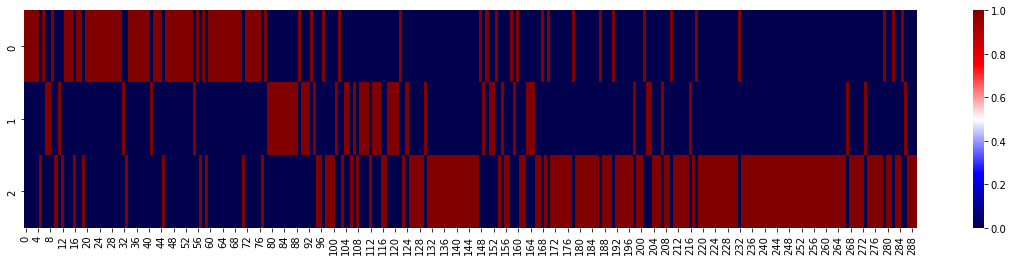

In [202]:
fig, ax = plt.subplots(figsize=(20,4))         # Sample figsize in inches
sns.heatmap(heatmap, cmap = "seismic", ax=ax)

<AxesSubplot:>

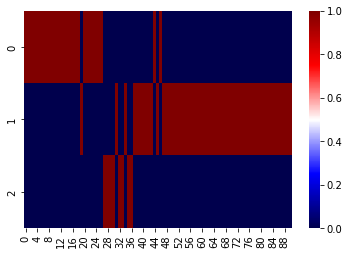

In [23]:
sns.heatmap(heatmap, cmap = "seismic")

<AxesSubplot:>

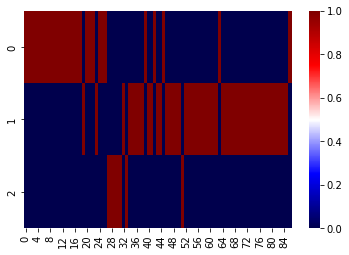

In [180]:
sns.heatmap(heatmap, cmap = "seismic")

In [ ]:
X = [0.9, 1.3, 2.2, 3.3, 5.0, 7.8, 13.3, 20.7]
X = np.concatenate(X, [])

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)


In [58]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([0.9, 1.3, 2.2, 3.3, 5.0, 7.8, 13.3, 20.7])
X = X.reshape(-1,1)
X = np.concatenate((X, np.concatenate(([X[0,0]], X[:-1, 0])).reshape(-1,1)), axis = 1)
X = np.concatenate((X, np.concatenate(([X[0,1]], X[:-1, 1])).reshape(-1,1)), axis = 1)
X = np.concatenate((X, np.concatenate(([X[0,2]], X[:-1, 2])).reshape(-1,1)), axis = 1)

y = X[2:,0]
train = X[2:,1:-1]

In [46]:
X

array([[ 0.9,  0.9,  0.9,  0.9],
       [ 1.3,  0.9,  0.9,  0.9],
       [ 2.2,  1.3,  0.9,  0.9],
       [ 3.3,  2.2,  1.3,  0.9],
       [ 5. ,  3.3,  2.2,  1.3],
       [ 7.8,  5. ,  3.3,  2.2],
       [13.3,  7.8,  5. ,  3.3],
       [20.7, 13.3,  7.8,  5. ]])

In [52]:
y

array([ 3.3,  5. ,  7.8, 13.3, 20.7])

In [57]:
train

array([[ 2.2,  1.3],
       [ 3.3,  2.2],
       [ 5. ,  3.3],
       [ 7.8,  5. ],
       [13.3,  7.8]])

In [59]:
reg = LinearRegression().fit(train, y)

In [63]:
reg.predict(np.array([[20.7, 13.3]]))

array([34.54705168])

In [64]:
reg.score(train, y)

0.9973489588106438

In [65]:
reg.intercept_

-0.342992140293493

In [66]:
reg.coef_

array([0.58357598, 1.71503917])

In [29]:
np.concatenate(([X[0,0]], X[:-1, 0]))

array([ 0.9,  0.9,  1.3,  2.2,  3.3,  5. ,  7.8, 13.3])